In [2]:
# Incêndios na Amazonia
import pandas as pd
import numpy as np
import seaborn as sb
import statistics as st
import matplotlib.pyplot as plt

In [3]:
dados_inpe = pd.read_csv("inpe_brazilian_amazon_fires_1999_2019.csv")

In [4]:
dados_inpe.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [5]:
dados_inpe.tail()

,year,month,state,latitude,longitude,firespots
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27
2103,2019,12,TOCANTINS,-6.769381,-48.475667,21


In [6]:
agrupado = dados_inpe.groupby(['state']).size()

In [7]:
agrupado

state
ACRE           204
AMAPA          197
AMAZONAS       250
MARANHAO       241
MATO GROSSO    252
PARA           250
RONDONIA       246
RORAIMA        243
TOCANTINS      221
dtype: int64

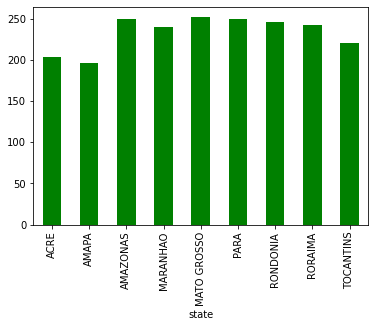

In [8]:
# Verificado dois problemas, estados inexistentes e estado fora da região sul
#imprimir um gráfico de barras comum
agrupado.plot.bar(color='green')

Text(0.5, 1.0, 'Focos de Incêndio')

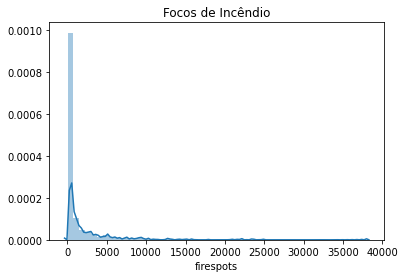

In [9]:
# Gera dados com histograma(distplot)
sb.distplot(dados_inpe['firespots']).set_title('Focos de Incêndio')

In [10]:
dados_inpe.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64

In [11]:
dados_inpe['firespots'].describe()

count     2104.000000
mean      1167.417776
std       2959.558714
min          1.000000
25%         16.000000
50%        121.000000
75%        755.000000
max      37926.000000
Name: firespots, dtype: float64

In [12]:
maximo = dados_inpe.loc[(dados_inpe['firespots'] > 10000)]
maximo

,year,month,state,latitude,longitude,firespots
47,1999,8,MATO GROSSO,-11.358813,-56.228129,12707
312,2002,8,MATO GROSSO,-10.646819,-55.591126,23642
313,2002,8,PARA,-7.272872,-51.737227,37926
321,2002,9,MATO GROSSO,-11.716144,-56.026531,23385
322,2002,9,PARA,-5.894362,-50.456673,22054
323,2002,9,RONDONIA,-11.007743,-62.702072,22133
330,2002,10,MATO GROSSO,-12.293828,-56.839623,13177
331,2002,10,PARA,-4.161796,-50.611925,15718
340,2002,11,PARA,-2.821384,-50.778367,20777
414,2003,8,MATO GROSSO,-10.834949,-57.269472,10224


In [13]:
# aqui seria legal filtrar por estado e sumarizar por ano, pra aí então exibir os gráficos
amazonas = dados_inpe.loc[(dados_inpe['state'] == 'AMAZONAS')]
amazonas.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
7,1999,2,AMAZONAS,-2.763167,-63.429781,43
13,1999,3,AMAZONAS,-4.104806,-66.101414,7
19,1999,4,AMAZONAS,-3.733060,-63.645850,2
29,1999,6,AMAZONAS,-2.087541,-64.482929,7


In [14]:
# h = np.histogram(amazonas.iloc[:,5], bins = 10) # visualização de como ficará o q o plt vai acabar fazendo
# h

In [15]:
# Visualização do histograma com 6 divisões
# plt.hist(amazonas.iloc[:,5], bins = 6) # plotar histograma na coluna 1 com 6 eixos. Cada eixo é um resumo do intervalo de dados em que está contido.
# plt.title('Focos de Incêndio Amazonas')
# plt.ylabel('Focos')
# plt.xlabel('Ano')

In [16]:
agrupado = dados_inpe.groupby(['state'])['firespots'].sum()
agrupado

state
ACRE           126471
AMAPA           39337
AMAZONAS       188483
MARANHAO       160543
MATO GROSSO    595378
PARA           942283
RONDONIA       340517
RORAIMA         46981
TOCANTINS       16254
Name: firespots, dtype: int64

In [17]:
agrupado_ano_amazonas = amazonas.groupby(['year'])['firespots'].sum()
agrupado_ano_amazonas

year
1999     1048
2000      857
2001     1297
2002    10203
2003    10191
2004     8083
2005    15644
2006    11697
2007    11293
2008     6701
2009     9280
2010    12139
2011     5028
2012     9114
2013     6512
2014     9008
2015    13419
2016    11173
2017    11685
2018    11446
2019    12665
Name: firespots, dtype: int64

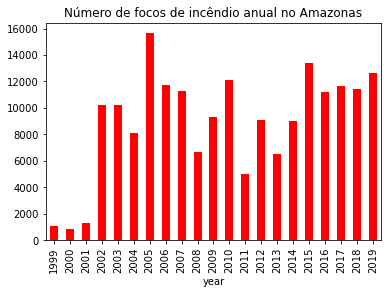

In [32]:
agrupado_ano_amazonas.plot.bar(color = 'red', title = 'Número de focos de incêndio anual no Amazonas')

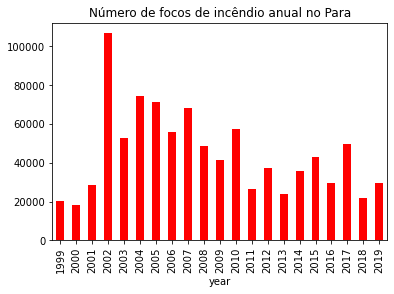

In [31]:
para = dados_inpe.loc[(dados_inpe['state'] == 'PARA')]
agrupado_para = para.groupby(['year'])['firespots'].sum()
agrupado_para.plot.bar(color = 'red', title = 'Número de focos de incêndio anual no Para')

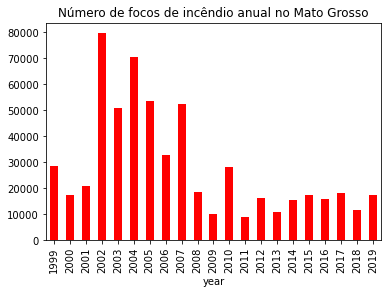

In [30]:
mt = dados_inpe.loc[(dados_inpe['state'] == 'MATO GROSSO')]
agrupado_mt = mt.groupby(['year'])['firespots'].sum()
agrupado_mt.plot.bar(color = 'red', title = 'Número de focos de incêndio anual no Mato Grosso')